In [1]:
# CNN plot the result of the prediction - March 2023
# Plot Multimodels
import pandas as pd
import numpy as np
from numpy import ma
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import colorcet as cc
import cmocean
import calendar
import os

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = '/home2/datahome/epauthen/CHLORO/cartopy_shapefiles'
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.2
numpy==1.23.5
xarray==2023.1.0
colorcet==3.0.1
cmocean==v3.0.3
cartopy==0.21.0


In [2]:
#Model choice
OUTPUT = '/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/'
model_name_0 = 'model12'
pred_path_0 = OUTPUT + model_name_0 + '/'
y_pm_0 = xr.open_dataset(pred_path_0 +'y_pred_metrics.nc')
y_tm_0 = xr.open_dataset(pred_path_0 +'y_test_metrics.nc')
qua_mask_0 = xr.open_dataset(pred_path_0 + "qua_masked.nc")

model_name_1 = 'model14'
pred_path_1 = OUTPUT + model_name_1 + '/'
y_pm_1 = xr.open_dataset(pred_path_1 +'y_pred_metrics.nc')
y_tm_1 = xr.open_dataset(pred_path_1 +'y_test_metrics.nc')
qua_mask_1 = xr.open_dataset(pred_path_1 + "qua_masked.nc")

d1 = '1993-01'
d2 = '2020-12'

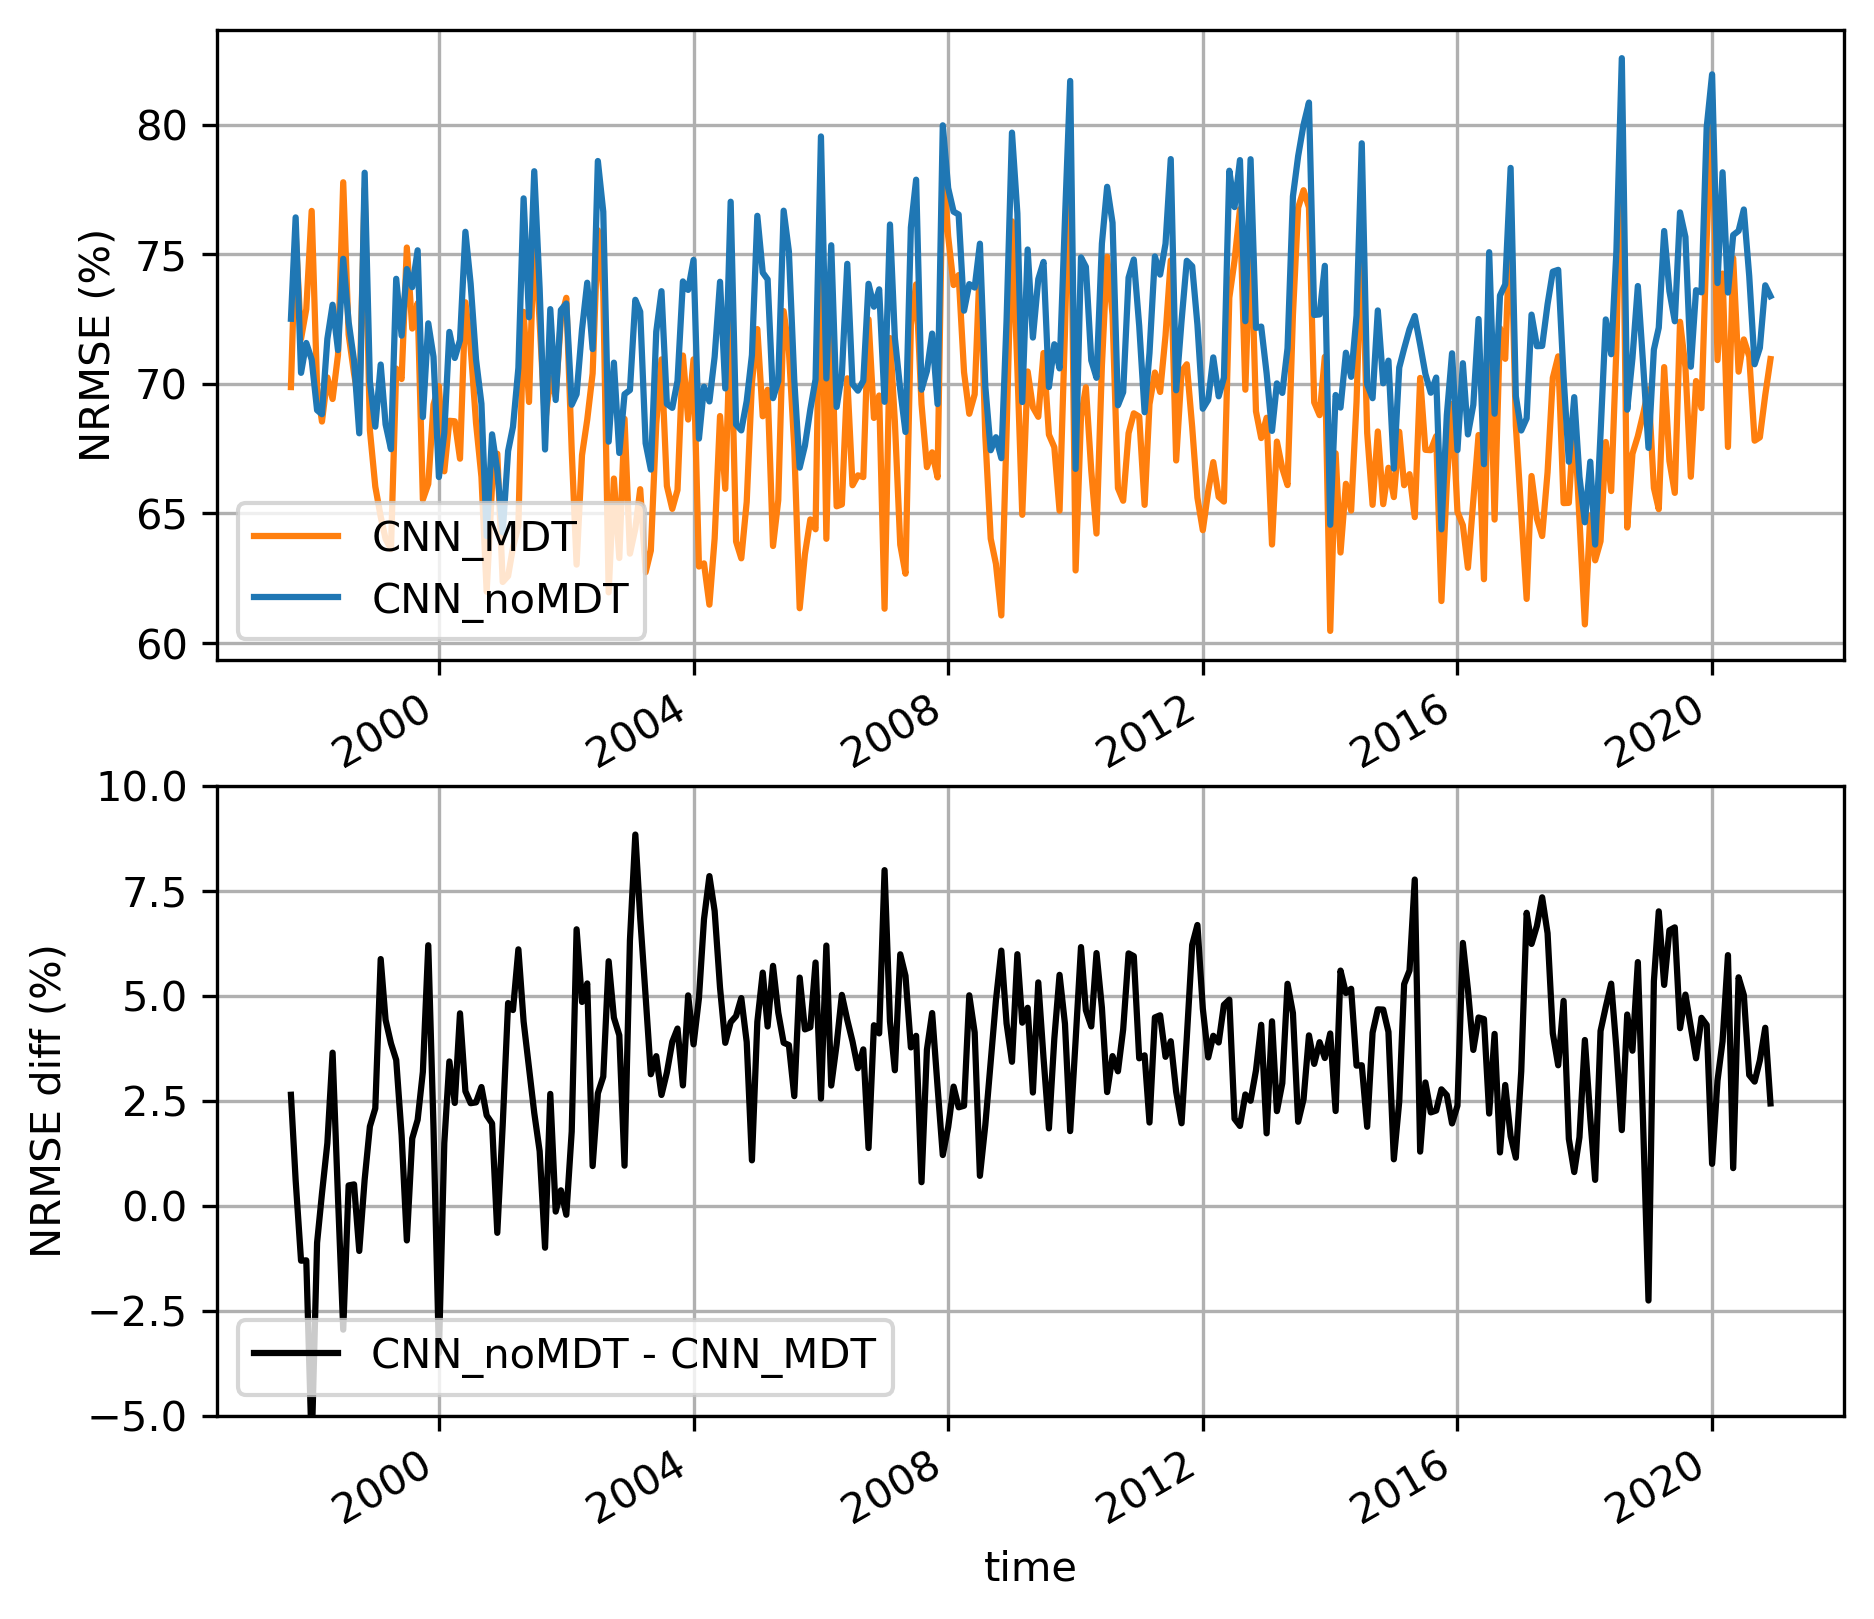

In [7]:
#Plots of NRMSE, Mean and std in function of time
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,6), dpi=300, facecolor='w', edgecolor='k')
(y_tm_0['chloro_nrmse_std']).plot(ax = ax[0], label = 'CNN_MDT',c = 'tab:orange')
(y_tm_1['chloro_nrmse_std']).plot(ax = ax[0], label = 'CNN_noMDT',c = 'tab:blue')
ax[0].set_ylabel('NRMSE (%)')
ax[0].legend(loc = "lower left")

(y_tm_1['chloro_nrmse_std']-y_tm_0['chloro_nrmse_std']).plot(ax = ax[1],label = 'CNN_noMDT ' + "-" + ' CNN_MDT',c = 'black')
ax[1].set_ylabel('NRMSE diff (%)')
ax[1].legend(loc = "lower left")

ax[1].set_ylim([-5,10])
ax[0].grid()
ax[1].grid()

plt.savefig('/home2/datahome/epauthen/CHLORO/Figure_GRL/Fig_MDT_sensitivity.png', dpi=300)

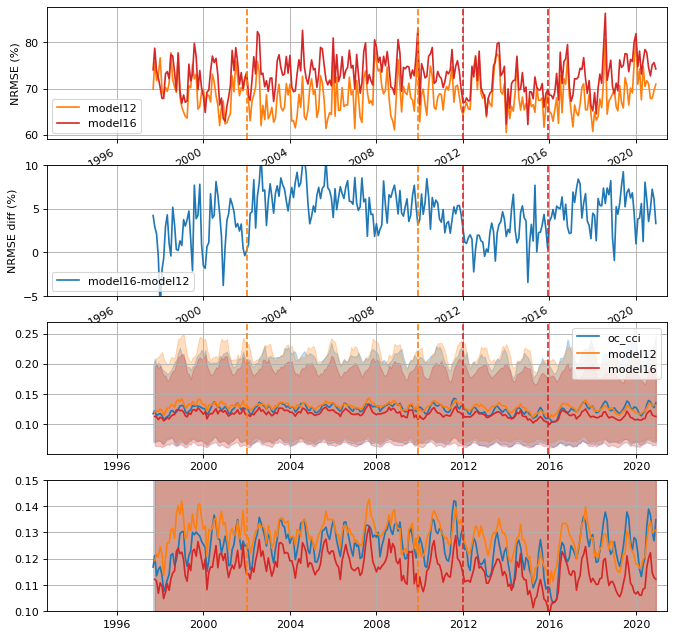

In [7]:
#Plots of NRMSE, Median and quartile for masked data
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
(y_tm_0['chloro_nrmse_std']).plot(ax = ax[0], label = model_name_0,c = 'tab:orange')
(y_tm_1['chloro_nrmse_std']).plot(ax = ax[0], label = model_name_1,c = 'tab:red')
ax[0].set_ylabel('NRMSE (%)')
ax[0].legend(loc = "lower left")

(y_tm_1['chloro_nrmse_std']-y_tm_0['chloro_nrmse_std']).plot(ax = ax[1],label = model_name_1 + "-" + model_name_0)
ax[1].set_ylabel('NRMSE diff (%)')
ax[1].legend(loc = "lower left")

for i in np.arange(2,4):
    y_tm = y_tm_0
    ax[i].plot(y_tm.time, y_tm.chloro_qua[1,:], label = "oc_cci",c = 'tab:blue')
    ax[i].fill_between(y_tm.time.data, y_tm.chloro_qua[0,:],  y_tm.chloro_qua[2,:],
        alpha=0.25, edgecolor='tab:blue', facecolor='tab:blue')

    y_pm = qua_mask_0
    ax[i].plot(y_pm.time, y_pm.chloro_pred[1,:],label = model_name_0,c = 'tab:orange')
    ax[i].fill_between(y_pm.time.data, y_pm.chloro_pred[0,:],  y_pm.chloro_pred[2,:],
        alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')

    y_pm = qua_mask_1
    ax[i].plot(y_pm.time, y_pm.chloro_pred[1,:],label = model_name_1,c = 'tab:red')
    ax[i].fill_between(y_pm.time.data, y_pm.chloro_pred[0,:],  y_pm.chloro_pred[2,:],
        alpha=0.25, edgecolor='tab:red', facecolor='tab:red')

ax[1].set_ylim([-5,10])
ax[3].set_ylim([0.10,0.15])
ax[2].legend(loc = "upper right")

for i in np.arange(4):
    ax[i].grid()
    ax[i].set_xlim([pd.to_datetime('1992-10'),pd.to_datetime('2021-06')])
#    ax[i].set_xlim([pd.to_datetime('2012-01'),pd.to_datetime('2015-12')])
    ax[i].axvline(x = pd.to_datetime('2002-01'),linestyle = '--',color = 'tab:orange')
    ax[i].axvline(x = pd.to_datetime('2009-12'),linestyle = '--',color = 'tab:orange')
    ax[i].axvline(x = pd.to_datetime('2012-01'),linestyle = '--',color = 'tab:red')
    ax[i].axvline(x = pd.to_datetime('2015-12'),linestyle = '--',color = 'tab:red')

In [ ]:
#Seasonal plot : 
y_tm = y_tm_0
yt_seas = y_tm.chloro_qua.groupby(y_tm.time.dt.month).median()

#Masked
y_pm = qua_mask_0
yp_seas_0 = y_pm.chloro_pred.groupby(y_pm.time.dt.month).median()

y_pm = qua_mask_1
yp_seas_1 = y_pm.chloro_pred.groupby(y_pm.time.dt.month).median()

#Unmasked
y_pm = y_pm_0
yp_seas_0u = y_pm.chloro_qua.groupby(y_pm.time.dt.month).median()

y_pm = y_pm_1
yp_seas_1u = y_pm.chloro_qua.groupby(y_pm.time.dt.month).median()

yt_seas.isel(quantile = 1).plot(label = 'oc_cci')
yp_seas_0.isel(quantile = 1).plot(label = model_name_0 + " masked",c = 'tab:orange')
yp_seas_1.isel(quantile = 1).plot(label = model_name_1 + " masked",c = 'tab:green')
yp_seas_0u.isel(quantile = 1).plot(label = model_name_0,c = 'tab:orange',linestyle = "dotted")
yp_seas_1u.isel(quantile = 1).plot(label = model_name_1,c = 'tab:green',linestyle = "dotted")
plt.grid()
plt.legend()
plt.title("1997-2020 Median")

In [ ]:
#Same but with quartiles
for q in np.arange(3):
    yt_seas.isel(quantile = q).plot(label = 'oc_cci',c = "tab:blue")
    yp_seas_0.isel(quantile = q).plot(label = model_name_0 + " masked",c = 'tab:orange')
    yp_seas_1.isel(quantile = q).plot(label = model_name_1 + " masked",c = 'tab:green')
    yp_seas_0u.isel(quantile = q).plot(label = model_name_0,c = 'tab:orange',linestyle = "dotted")
    yp_seas_1u.isel(quantile = q).plot(label = model_name_1,c = 'tab:green',linestyle = "dotted")
plt.grid()
plt.title("1997-2020 Median")